In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [52]:
#a)
#Your code:
data = pd.read_csv('/content/kc_house_data.csv')
data.head()
#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
#b) 
print(data.columns.values)

house_categorical_df = ["id", "date", "waterfront", "view", "grade", "zipcode", "condition"]

house_numerical_df = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors","sqft_above", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]


['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [50]:
#c)
#Your code:

print(data[house_numerical_df].describe())

#Hint: Function describe()

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       1.494309   1788.390691     291.509045   1971.005136     84.402258   
std        0.539989    828.090978     442.575043

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

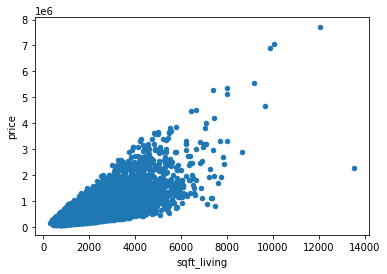

In [53]:
#a)
#Your code:

data.plot.scatter(x='sqft_living', y='price')
plt.show()
#Hint plt.scatter

As we see from the diagram usually the bigger square footage is the higher price is. The most of houses have square footage between 0 and 6000.

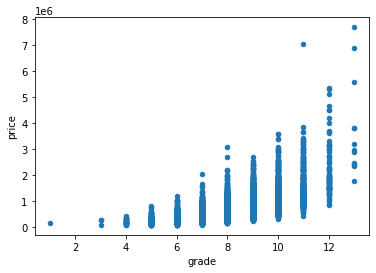

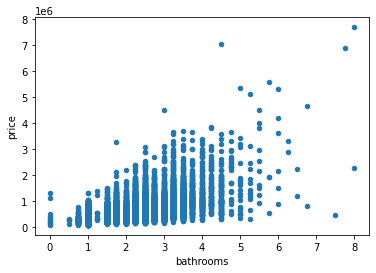

In [54]:
#b)
#Your code:
data.plot.scatter(x='grade', y='price')

#price influenced by number of bathrooms
data.plot.scatter(x='bathrooms', y='price')

plt.show()


The apartments are usually more expensive if they are on higher grade.
More expensive are also houses with more bathrooms.

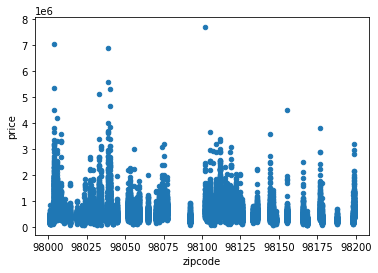

In [55]:
#c)
#Your code:
data.plot.scatter(x='zipcode', y='price')
plt.show()


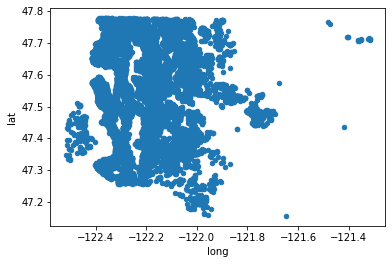

In [56]:
#Your code:
data.plot.scatter(x='long', y='lat')
plt.show()


Apartments are mainly located in western part of the city. The highest prices have apartments with zipcodes around 9800-9810, 9840.

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


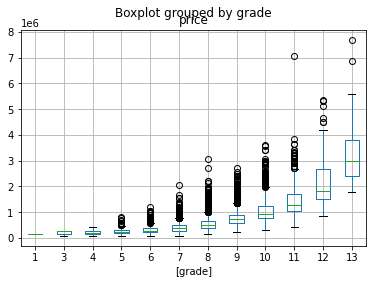

In [57]:
#a)
#Your code:
data.boxplot(column=['price'], by = ['grade'])
#Hint: plt.boxplot

As we have seen prevously apartments are usually more expensive if they are on higher grade. Both minimum, median and maximum of price is getting higher and higher.

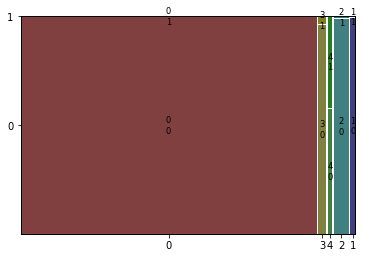

In [61]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(data, ['view', 'waterfront'])
plt.show()

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [34]:
#a)
#Your code:
data.loc[(data['bedrooms'] == 3) & (data['bathrooms'] == 2) & (data['floors'] == 2)]
#Hint: pandas.DataFrame.loc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16,1875500060,20140731T000000,395000.0,3,2.0,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
150,3362900810,20140820T000000,532170.0,3,2.0,1360,3090,2.0,0,0,...,8,1360,0,1990,0,98103,47.6838,-122.353,1500,3090
294,9297300045,20140709T000000,550000.0,3,2.0,1970,4166,2.0,0,3,...,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
365,723099065,20150130T000000,465000.0,3,2.0,1840,40438,2.0,0,0,...,7,1840,0,1994,0,98045,47.4853,-121.709,1380,44049
462,8944290160,20141104T000000,230000.0,3,2.0,1510,3413,2.0,0,0,...,7,1510,0,1985,0,98031,47.3912,-122.167,1570,3777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600
20952,9826700697,20141103T000000,549900.0,3,2.0,1280,960,2.0,0,0,...,9,1040,240,2014,0,98122,47.6020,-122.311,1280,1173
21220,2461900446,20141023T000000,372000.0,3,2.0,1330,1042,2.0,0,0,...,8,1060,270,2014,0,98136,47.5522,-122.382,1440,2428
21531,5637500082,20141203T000000,346000.0,3,2.0,1060,1184,2.0,0,0,...,7,730,330,2006,0,98136,47.5443,-122.385,1270,1601


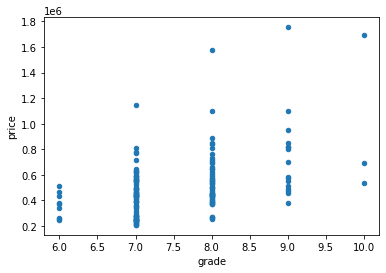

In [35]:
#b)
#Your code:
data_ex4 = data.loc[(data['bedrooms'] == 3) & (data['bathrooms'] == 2) & (data['floors'] == 2)]
data_ex4.plot.scatter(x='grade', y='price')
plt.show()


In [62]:
#c)
#Your code:

sorted_indices = (data_ex4["price"] / data_ex4["sqft_living"]).sort_values().index
data_ex4.loc[sorted_indices, :]

#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,9829200325,20140617T000000,765000.0,3,2.0,1570,7000,2.0,0,2,...,8,1050,520,1971,0,98122,47.6061,-122.286,1990,6675
13853,6795100330,20140625T000000,1150000.0,3,2.0,2110,18815,2.0,0,0,...,7,2110,0,1979,0,98075,47.5836,-122.042,2690,21010
10527,5318100935,20141020T000000,850000.0,3,2.0,1540,3600,2.0,0,0,...,8,1540,0,1900,1988,98112,47.6343,-122.283,2970,3600
5827,9829200250,20150105T000000,1697000.0,3,2.0,2600,6600,2.0,0,4,...,10,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270
